# Online Retail Analysis
Author: Kelompok Sains Data Pada Industri

| Name | NIM |
| --- | --- |
| Nadya Khairani | 1305210069 |
| Ariq Heritsa Maalik | 1305213031 |

## Introduction

### 📕 Background

Bisnis retail merupakan sektor yang menjual produk kepada konsumen akhir. Di era digital ini, bisnis retail harus menghadapi persaingan sulit dan sangat kompetitif. Untuk mengatasi hal tersebut, pelaku bisnis retail harus memahami perilaku konsumen, mengidentifikasi pola pembelian, dan memahami tren pasar agar dapat bersaing dan dapat mengambil keputusan yang tepat.

### 🎯 Objective

Tujuan dari analisis ini yaitu untuk menggali informasi dan pola tersembunyi pada data yang telah dikumpulkan. Dengan mencermati fitur-fitur yang ada, kami memiliki target untuk mengeksplorasi dan mengekstrak informasi berharga yang dapat membantu pelaku bisnis retail. Analisis yang akan dilakukan yaitu mengamati terkait produk, negara, serta pelanggan.

## Exploratory Analysis

### The Data

Data yang kami olah berasal dari sebuah bisnis retail online yang berada di Britania Raya. Customer bisnis tersebut tidak terbatas hanya dari kepulauan britania saja, namun juga berasal dari penjuru dunia. Fitur yang terkumpul pada data ini berupa `InvoiceNo`, `StockCode`, `Description`, `Quantity`, `InvoiceDate`, `UnitPrice`, `CustomerID`, dan `Country`

Penjelasan tiap atribut dapat dilihat pada poin berikut:
- `InvoiceNo` --> Nomor invoice. Nominal. Berupa 6 digit nomor unik yang dimiliki tiap transaksi. Jika kodenya diawali dengan karakter 'c', maka transaksi tersebut adalah transaksi yang dibatalkan.
- `StockCode` --> Kode dari produk. Nominal. Berupa 5 digit angka unik yang dimiliki tiap produk.
- `Description` --> Nama dari produk. Nominal.
- `Quantity` --> Kuantitas yang dibeli customer pada suatu produk di satu transaksi. Numerik.
- `InvoiceDate` --> Menyatakan pada tanggal berapa transaksi tersebut terjadi.
- `UnitPrice` --> Harga dari suatu produk. Numerik.
- `CustomerID` --> Kode unik yang dimiliki tiap customer. Nominal.
- `Country` --> Negara asal dari customer. Nominal.

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import calendar
from operator import attrgetter

sns.set()

In [2]:
ecommerce = pd.read_csv('ecommerce_data.csv', sep=',', encoding='utf-8')
ecommerce

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,12680.0,France


### Data Inspection

Inspeksi data ini dilakukan untuk melihat apakah ada anomali pada data atau tidak. Kami melakukan pengecekan pada distributsi tiap fitur, baris data yang kosong (null values), dan melihat tipe data yang tidak sesuai.

Dari data ini kita bisa melihat bahwa distribusinya condong ke arah positif (positive skewed). Hal ini menunjukkan bahwa kita tidak bisa menggunakan mean sebagai metode imputasi data karena rata-ratanya sangat dipengaruhi oleh nilai yang sangat tinggi.

Untuk melakukan analisis pada data, kami akan merubah tipe data `InvoiceDate` menjadi datetime dan `CustomerID` menjadi object. Penggantian tipe data ini dilakukan karena kedua fitur tersebut memiliki tipe data yang salah.

Fitur `CustomerId` memiliki persentase nilai kosong yang tinggi sekitar 25% jika dibandingkan dengan fitur lainnya. Sedangkan fitur tersebut penting untuk menganalisis retensi pelanggan nantinya. Maka dari itu, perlu ada tindakan yang dilakukan agar analisisnya berjalan dengan baik.

In [3]:
display(ecommerce.describe().transpose())
display(ecommerce.dtypes)

,count,mean,std,min,25%,50%,75%,max
Quantity,535874.0,9.587927,153.292222,-74215.00,1.00,3.00,10.00,74215.0
UnitPrice,535874.0,4.636533,97.302232,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,403182.0,15287.687868,1714.009551,12346.00,13952.00,15152.00,16791.00,18287.0


InvoiceNo       object
StockCode       object
Description     object
Quantity       float64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [4]:
# convert InvoiceDate dtype into datetime
ecommerce['InvoiceDate'] = pd.to_datetime(ecommerce['InvoiceDate'])

In [5]:
def plot_null_values(df, title='Percentage of Null Values'):
    null_values = df.isnull().sum() / len(df) * 100
    null_values = null_values.sort_values(ascending=True)

    fig = px.bar(
        x=null_values.values, 
        y=null_values.index, 
        height=600,
        color_continuous_scale=px.colors.diverging.Tealrose,
        color=null_values.values,
        labels={
            'x': 'Percentage of Null Values',
            'y': '',
        },
        template='plotly_white',
    )

    fig.add_vline(x=null_values.values.mean(), line_width=2, line_dash='dash')
    fig.add_annotation(
        x=null_values.values.mean() + 0.1, 
        y=2, 
        text=f'Average: {null_values.values.mean():.2f}%', 
        showarrow=True, 
        arrowhead=1,
        bordercolor='black',
        borderpad=5,
        bgcolor='white',
        ax=50
    )

    for col in null_values.index:
        fig.add_annotation(
            x=null_values[col] + 0.9, 
            y=col,
            text=f'{null_values[col]:.2f}%', 
            showarrow=False, 
            font=dict(
                family='Helvetica',
                size=14,
                color='#ff5252' if null_values[col] > 5 else '#272b4f'
            ),
        )

    fig.update_layout(
        title=dict(
            text = f'<b>{title}</b>',
            x=0.03,
            y=0.96,
            font=dict(
                family='Helvetica',
                size=24,
                color='#272b4f'
            ),
        ),
    )

    fig.show()

In [6]:
plot_null_values(ecommerce)

### Drop Columns and Missing Values

Setelah melihat hasil inspeksi data yang kosong, maka semua fitur yang memiliki null values akan dihapus. Hal ini bertujuan agar analisisnya berjalan dengan baik. Selain itu, terdapat juga produk yang memiliki harga 0, untuk mengatasi hal itu kami menggantinya dengan nilai median.

Kami juga memfilter produk yang merupakan input manual oleh admin, ongkos kirim, beserta hal lain yang bukan termasuk produk dari retail.

In [7]:
subsets = ['StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice', 'Country', 'Description']
ecommerce.dropna(inplace=True)

In [8]:
ecommerce['CustomerID'] = ecommerce['CustomerID'].astype('str')

In [9]:
filter_stockcode = ['POST', 'DOT', 'M', 'BANK CHARGES', 'D', 'CRUK']
ecommerce = ecommerce[~ecommerce['StockCode'].isin(filter_stockcode)]

In [10]:
ecommerce['UnitPrice'].replace(0, ecommerce.UnitPrice.median(), inplace=True)

/var/folders/jx/gtzvjtg151zf107lv_8dbd9w0000gn/T/ipykernel_34547/529809895.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Creating New Columns

Untuk memperluas pencarian pola tertentu pada data, kami membuat fitur baru dari beberapa fitur yang ada. Fitur `UnitPriceCategory` dibuat untuk mengkategorikan harga produk berdasarkan tingkat kemahalannya. Kemudian fitur `TotalOrder` menyatakan pendapatan yang didapat dari produk tersebut.

In [11]:
# Categorized UnitPrice into 4 categories by its quartiles from 0
bins = [0, ecommerce['UnitPrice'].quantile(0.25), ecommerce['UnitPrice'].quantile(0.5), ecommerce['UnitPrice'].quantile(0.75), ecommerce['UnitPrice'].max()]

ecommerce['UnitPriceCategory'] = pd.cut(ecommerce['UnitPrice'], bins=bins, labels=['Very Cheap', 'Cheap', 'Expensive', 'Very Expensive'])

/var/folders/jx/gtzvjtg151zf107lv_8dbd9w0000gn/T/ipykernel_34547/596601687.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [12]:
ecommerce['TotalOrder'] = ecommerce['Quantity'] * ecommerce['UnitPrice']

/var/folders/jx/gtzvjtg151zf107lv_8dbd9w0000gn/T/ipykernel_34547/449167257.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Find Purchasing Patterns

### Analyze unit prices of the items

Pendapatan terbesar dari produk yang dijual didapat dari produk yang memiliki harga tinggi. Sedangkan orang-orang cenderung lebih banyak membeli barang dengan harga yang murah.

In [13]:
ecommerce.UnitPrice.describe()

count    401400.000000
mean          2.926954
std           4.528791
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

In [14]:
def map_ordinal(col):
    if col == 'Very Cheap':
        return 0
    elif col == 'Cheap':
        return 1
    elif col == 'Expensive':
        return 2
    else:
        return 3

ecommerce_by_unit = ecommerce.query('Quantity > 0')
ecommerce_by_unit['UnitPriceCategoryOrdinal'] = ecommerce_by_unit['UnitPriceCategory'].apply(map_ordinal)

/var/folders/jx/gtzvjtg151zf107lv_8dbd9w0000gn/T/ipykernel_34547/3639212659.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
fig = px.bar(
    ecommerce_by_unit.groupby('UnitPriceCategoryOrdinal', as_index=False).agg({'TotalOrder': 'sum', 'UnitPriceCategory': 'first'}),
    x='UnitPriceCategory',
    y='TotalOrder',
    color='UnitPriceCategory',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    template='plotly_white',
    height=400,
    width=float('inf'),
)

fig.update_layout(
    title=dict(
        text='<b>Total Revenue by Unit Price Category</b>',    
        x=0.03,
        y=0.96,
        font=dict(
            family='Helvetica',
            size=24,
            color='#272b4f'
        ),
    ),
),

fig.show()

In [16]:
fig = px.bar(
    ecommerce_by_unit.groupby('UnitPriceCategoryOrdinal', as_index=False).agg({'Quantity': 'sum', 'UnitPriceCategory': 'first'}),
    x='UnitPriceCategory',
    y='Quantity',
    color='UnitPriceCategory',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    template='plotly_white',
    height=400,
)

fig.update_layout(
    title=dict(
        text='<b>Most Bought Items by Unit Price Category</b>',    
        x=0.03,
        y=0.96,
        font=dict(
            family='Helvetica',
            size=24,
            color='#272b4f'
        ),
    ),
),

fig.show()

In [17]:
fig = px.scatter(
    ecommerce_by_unit.groupby('Description', as_index=False).agg({'UnitPrice': 'first', 'Quantity': 'sum', 'TotalOrder': 'sum', 'UnitPriceCategory': 'first', 'UnitPriceCategoryOrdinal': 'first'}).sort_values('UnitPriceCategoryOrdinal'),
    x='Quantity',
    y='TotalOrder', 
    color='UnitPriceCategory',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    log_x=True,
    log_y=True,
    height=600,
    labels={
        'TotalOrder': 'Total Revenue',
        'Quantity': 'Quantity',
    },
)

fig.update_layout(
    title=dict(
        text = '<b>Total Revenue vs Quantity</b>',
        x=0.03,
        font=dict(
            family='Helvetica',
            size=24,
            color='#272b4f'
        ),
    ),
)

fig.show()

### Most Frequently Sold Products

Plot ini menunjukkan 10 barang teratas yang paling banyak dibeli oleh pelanggan.

In [18]:
top_10_products = ecommerce.groupby('Description', as_index=False)\
    .agg({'Quantity': 'sum'}).sort_values('Quantity', ascending=False).head(10)

fig = px.bar(
    top_10_products.sort_values('Quantity', ascending=True),
    y='Description',
    x='Quantity',
    color='Quantity',
    color_continuous_scale=px.colors.diverging.RdYlGn,
    height=600,
    labels={
        'Description': '',
        'Quantity': 'Quantity Sold',
    },
    template='plotly_white',
)

fig.update_layout(
    title=dict(
        text = '<b>Most Frequently Sold Products</b>',
        x=0.03,
        y=0.96,
        font=dict(
            family='Helvetica',
            size=24,
            color='#272b4f'
        ),
    ),
)

fig.show()

### Total Revenue Generated by Products

Visualisasi di bawah menunjukkan 10 barang dengan pendapatan tertinggi dari hasil penjualan.

In [19]:
top_10_products = ecommerce.groupby('Description', as_index=False)\
    .agg({'TotalOrder': 'sum'}).sort_values('TotalOrder', ascending=False).head(10)

fig = px.bar(
    top_10_products.sort_values('TotalOrder', ascending=True),
    y='Description',
    x='TotalOrder',
    color='TotalOrder',
    color_continuous_scale=px.colors.diverging.RdYlGn,
    height=600,
    labels={
        'TotalOrder': 'Total Revenue',
        'Description': '',
    },
    template='plotly_white',
)

fig.update_layout(
    title=dict(
        text = '<b>Total Revenue Generated by Products</b>',
        x=0.03,
        y=0.96,
        font=dict(
            family='Helvetica',
            size=24,
            color='#272b4f'
        ),
    ),
)

fig.show()

### Analyze per country

Analisis ini bertujuan untuk melihat perbandingan pola pembelian berdasarkan negara tertentu.

In [20]:
top_10_countries = ecommerce.groupby('Country', as_index=False)\
    .agg({'CustomerID': 'count'})\
    .sort_values(by='CustomerID', ascending=False).head(10)

fig = px.bar(
    top_10_countries,
    x = 'Country',
    y = 'CustomerID',
    color='CustomerID',
    color_continuous_scale=px.colors.diverging.RdYlGn,
    height=600,
    labels={
        'CustomerID': 'Count',
        'Country': '',
    },
    template='plotly_white',
)

fig.update_layout(
    title=dict(
        text = '<b>Distribution of Customers by Country</b>',
        x=0.03,
        y=0.96,
        font=dict(
            family='Helvetica',
            size=24,
            color='#272b4f'
        ),
    ),
)

fig.show()

### Top 10 Countries and Their Most Frequently Sold Products

Table di bawah menunjukkan 10 negara dengan barang yang paling banyak dibeli.

In [21]:
countries_products = ecommerce.groupby(['Country', 'Description'], as_index=False).agg({'CustomerID': 'count'})\
    .sort_values('CustomerID', ascending=False).groupby('Country').head(1).sort_values('CustomerID', ascending=False)

countries_products[countries_products['Country'].isin(top_10_countries['Country'])]

,Country,Description,CustomerID
18681,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,1980
8290,Germany,ROUND SNACK BOXES SET OF4 WOODLAND,120
3370,EIRE,CARRIAGE,99
6500,France,RABBIT NIGHT LIGHT,74
1476,Belgium,ROUND SNACK BOXES SET OF4 WOODLAND,38
10767,Netherlands,SPACEBOY LUNCH BOX,28
13329,Spain,REGENCY CAKESTAND 3 TIER,25
14535,Switzerland,PLASTERS IN TIN SPACEBOY,19
12136,Portugal,RETROSPOT TEA SET CERAMIC 11 PC,14
465,Australia,SET OF 3 CAKE TINS PANTRY DESIGN,10


### Analyze repeat customers

Untuk melihat pelanggan yang melakukan pembelian berulang kali, kami menggunakan metode cohort analysis. Analisis tersebut ditujukan untuk mengetahui pelanggan yang loyal perbulannya berdasarkan kapan pertama kali dia melakukan pembelian.

Dari semua pelanggan, ada sekitar 64.82% yang loyal terhadap bisnis retail tersebut.

Dengan metode cohort analysis, kita dapat mengetahui bahwa pada periode bulan kedua, rata-rata hanya 20% pelanggan melakukan pembelian ulang.

In [22]:
n_orders = ecommerce.query('Quantity > 0').groupby(['CustomerID'])['InvoiceNo'].nunique()
multi_order_percentage = np.sum(n_orders > 1) / ecommerce['CustomerID'].nunique()
print(f'{100 * multi_order_percentage:.2f}% of customers ordered more than once.')

64.82% of customers ordered more than once.


In [23]:
ecommerce_cohort = ecommerce.query('Quantity > 0').copy()

ecommerce_cohort['order_month'] = ecommerce_cohort['InvoiceDate'].dt.to_period('M')
ecommerce_cohort['cohort'] = ecommerce_cohort.groupby('CustomerID')['InvoiceDate'] \
                 .transform('min') \
                 .dt.to_period('M') 

ecommerce_cohort = ecommerce_cohort.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('CustomerID', 'nunique')) \
              .reset_index(drop=False)
ecommerce_cohort['period_number'] = (ecommerce_cohort.order_month - ecommerce_cohort.cohort).apply(attrgetter('n'))

cohort_pivot = ecommerce_cohort.pivot_table(index = 'cohort', columns = 'period_number', values = 'n_customers')

cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

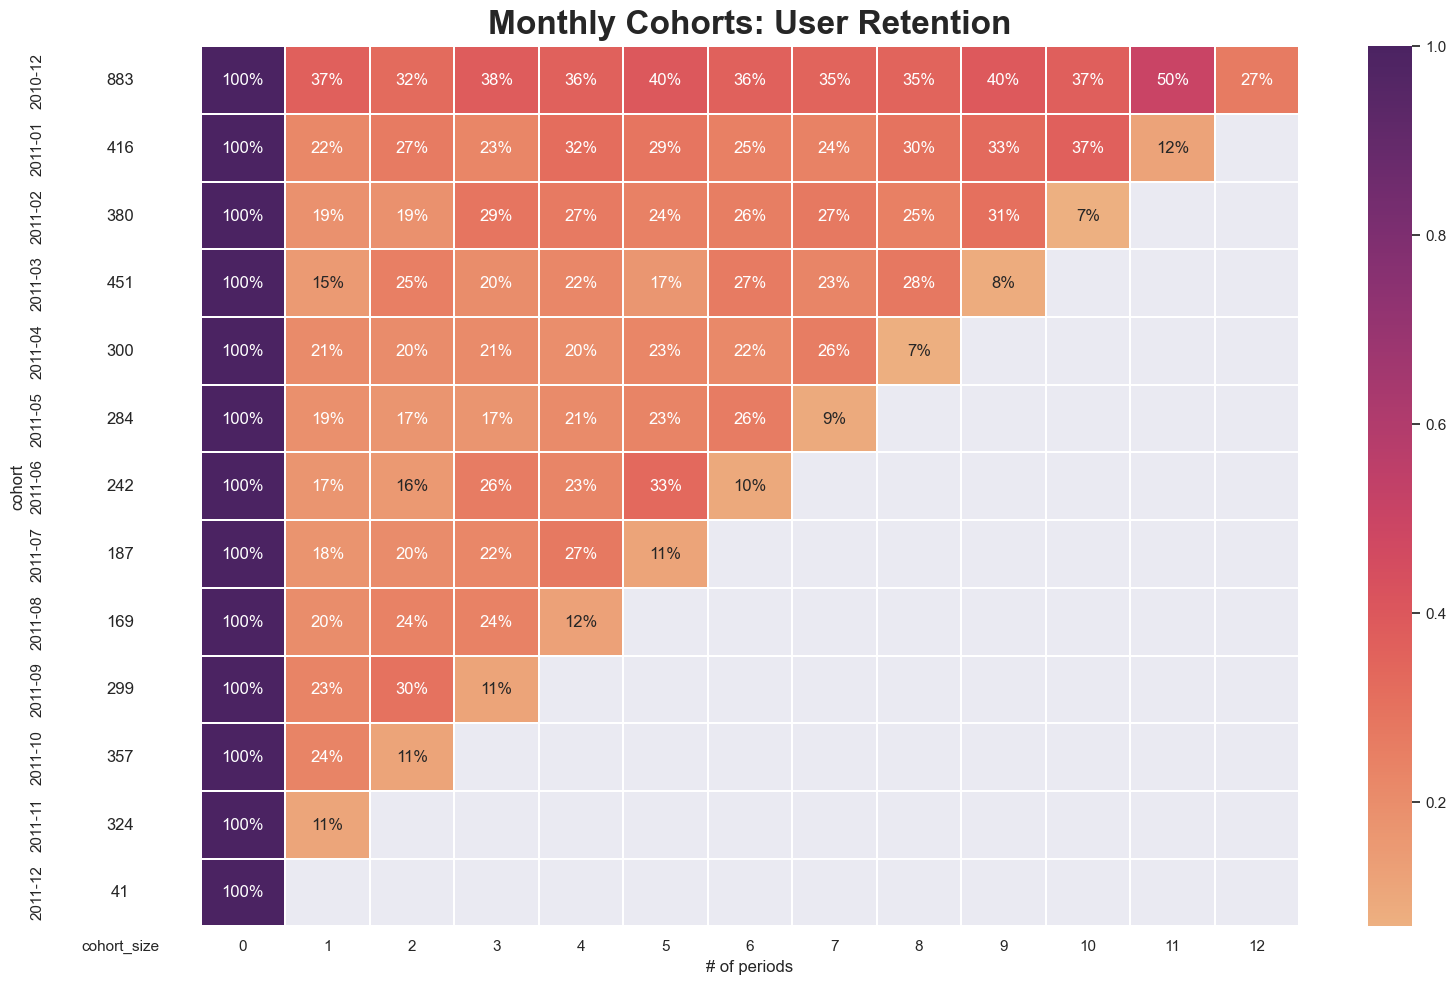

In [24]:
white_cmap = ['#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff']

fig, ax = plt.subplots(1, 2, figsize=(16, 10), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

# retention matrix
sns.heatmap(
    retention_matrix, 
    mask=retention_matrix.isnull(), 
    annot=True, 
    fmt='.0%', 
    cmap='flare', 
    ax=ax[1],
    linewidths=0.05,
)

ax[1].set_title('Monthly Cohorts: User Retention', fontsize=24, fontweight='bold', y=1.005)
ax[1].set(xlabel='# of periods', ylabel='')

# cohort size
cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
sns.heatmap(
    cohort_size_df, 
    annot=True, 
    cbar=False, 
    fmt='g', 
    cmap=white_cmap,
    ax=ax[0]
)

fig.tight_layout()

## Find item trends

### Frequency of Transactions

Dari heatmap yang dihasilkan kita bisa melihat frekuensi paling ramai terjadinya pembelian ada di bulan november. Selain itu, kita juga bisa mengamati bahwa hari kamis memiliki rata-rata pembelian yang paling tinggi dibandingkan hari-hari lainnya.

Orang-orang juga cenderung melakukan transaksi pada jam 9 pagi sampai jam 4 sore.

In [25]:
ecommerce['Year'] = ecommerce['InvoiceDate'].dt.year
ecommerce['Month'] = ecommerce['InvoiceDate'].dt.month
ecommerce['DayOfWeek'] = ecommerce['InvoiceDate'].dt.dayofweek
ecommerce['Hour'] = ecommerce['InvoiceDate'].dt.hour
ecommerce['Minute'] = ecommerce['InvoiceDate'].dt.minute
ecommerce['TransactionDate'] = pd.to_datetime(ecommerce['InvoiceDate'].dt.date)

/var/folders/jx/gtzvjtg151zf107lv_8dbd9w0000gn/T/ipykernel_34547/3497641519.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/jx/gtzvjtg151zf107lv_8dbd9w0000gn/T/ipykernel_34547/3497641519.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/jx/gtzvjtg151zf107lv_8dbd9w0000gn/T/ipykernel_34547/3497641519.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

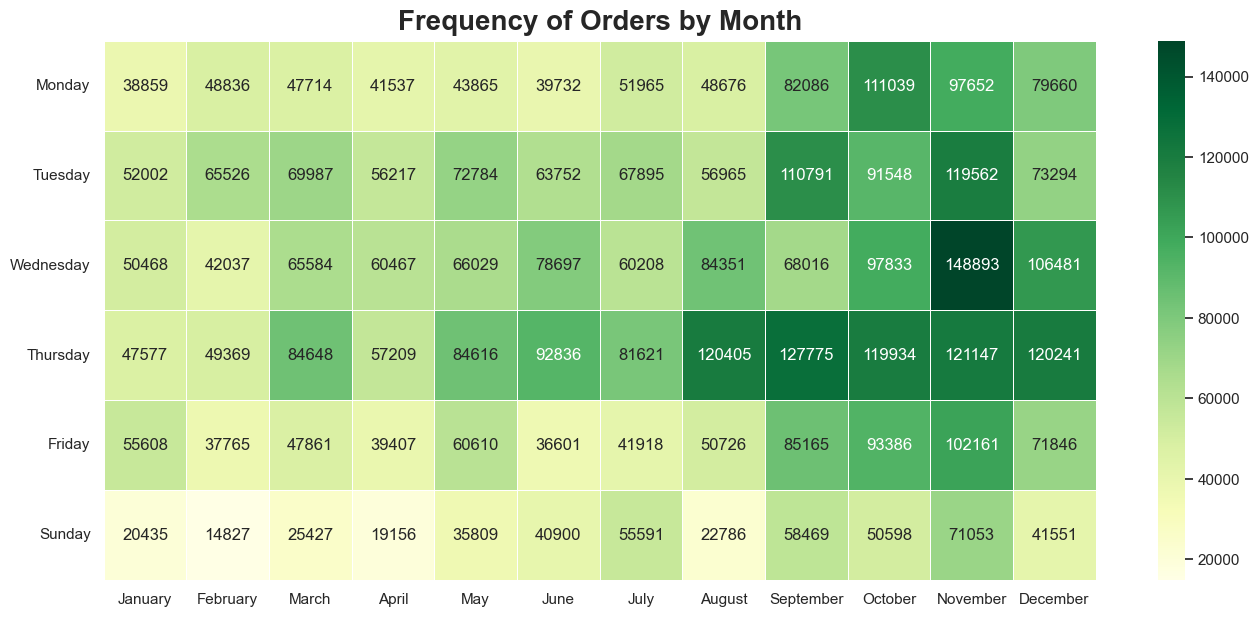

In [26]:
day_month_crosstab = pd.crosstab(ecommerce['DayOfWeek'], ecommerce['Month'], values=ecommerce['Quantity'], aggfunc='sum')

# change index to day names and month names
day_month_crosstab.index = day_month_crosstab.index.map(lambda x: calendar.day_name[x])
day_month_crosstab.columns = day_month_crosstab.columns.map(lambda x: calendar.month_name[x])

fig = plt.figure(figsize=(16, 7))

sns.heatmap(day_month_crosstab, cmap='YlGn', annot=True, fmt='g', linewidths=0.5)

plt.title('Frequency of Orders by Month', fontsize=20, fontweight='bold', y=1.005)

plt.xlabel('')
plt.ylabel('')
plt.yticks(rotation=0)

plt.show()

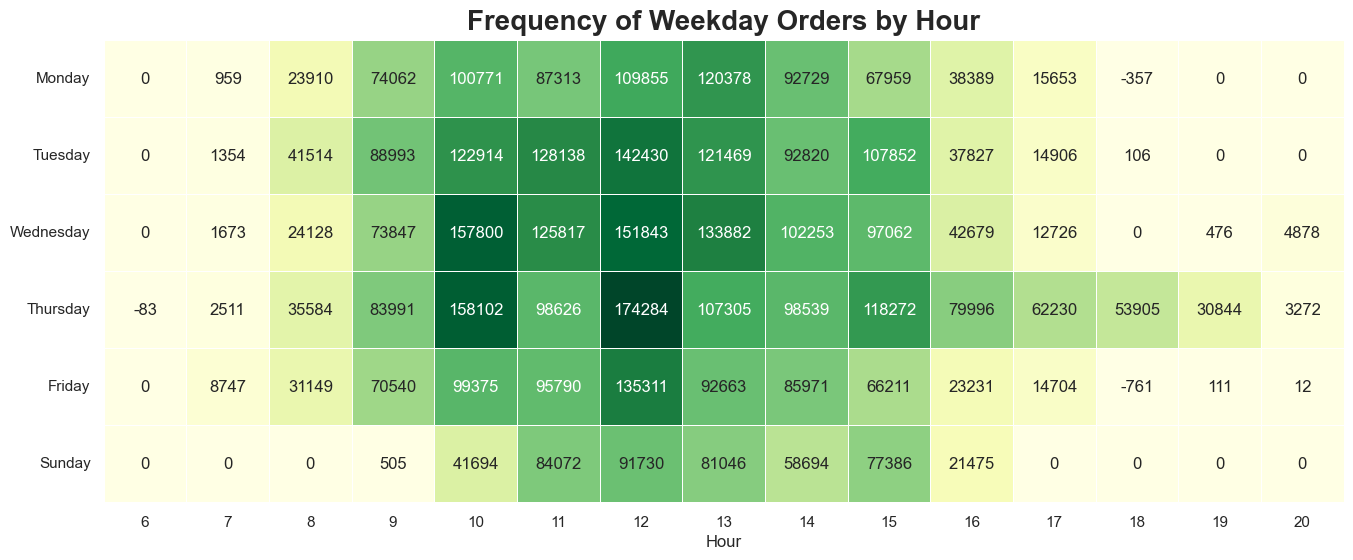

In [27]:
day_hour_crosstab = pd.crosstab(ecommerce['DayOfWeek'], ecommerce['Hour'], values=ecommerce['Quantity'], aggfunc='sum')

# change index to day names
day_hour_crosstab.index = day_hour_crosstab.index.map(lambda x: calendar.day_name[x])

# fill NaN values with 0
day_hour_crosstab.fillna(0, inplace=True)

fig = plt.figure(figsize=(16, 6))

sns.heatmap(day_hour_crosstab, cmap='YlGn', annot=True, fmt='g', linewidths=0.5, cbar=False)

plt.title('Frequency of Weekday Orders by Hour', fontsize=20, fontweight='bold', y=1.005)

plt.xlabel('Hour')
plt.ylabel('')

plt.yticks(rotation=0)

plt.show()

### Item Trends by Period

Kami mengambil 10 barang yang paling sering dibeli oleh pelanggan untuk dianalisis. Beberapa barang tersebut memiliki tren pembelian berdasarkan bulan tertentu. Sebagai contoh produk World War 2 Gliders lebih sering dibeli ketika mendekati tanggal yang memperingati D-Day.

In [28]:
# # Group by time period and product identifier, and calculate the count of items sold
# item_trends = ecommerce.groupby([pd.Grouper(key='InvoiceDate', freq='M'), 'StockCode'])['Quantity'].count().reset_index()

# # Rename the count column for clarity
# item_trends = item_trends.rename(columns={'Quantity': 'ItemsSold'})

# # Print the resulting item trends
# item_trends.sort_values(by='ItemsSold', ascending=False).head(10)

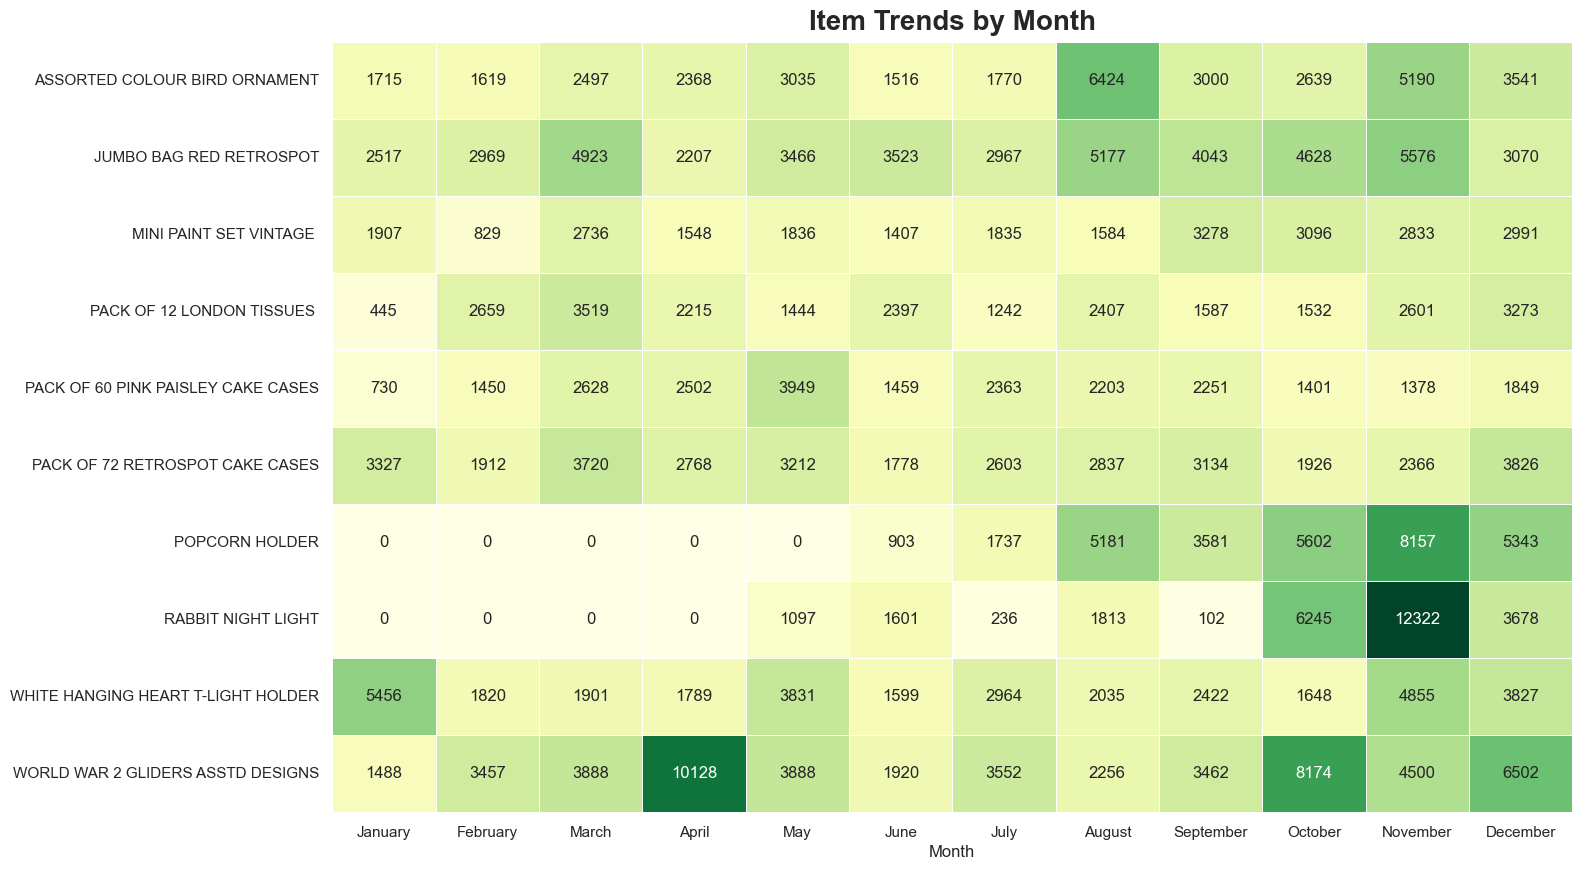

In [29]:
# find the most frequently sold products
top_10_products = ecommerce.groupby('Description', as_index=False)\
    .agg({'Quantity': 'sum'}).sort_values('Quantity', ascending=False).head(10)
top_10_products = ecommerce[ecommerce['Description'].isin(top_10_products['Description'])]\

# Group by month and product identifier, and calculate the sum of items sold
item_trends_crosstab = pd.crosstab(top_10_products['Description'], top_10_products['Month'], values=top_10_products['Quantity'], aggfunc='sum')
item_trends_crosstab.fillna(0, inplace=True)

# change columns to day names and month names
item_trends_crosstab.columns = item_trends_crosstab.columns.map(lambda x: calendar.month_name[x])

# plot the heatmap
fig = plt.figure(figsize=(16, 10))

sns.heatmap(item_trends_crosstab, cmap='YlGn', annot=True, fmt='g', linewidths=0.5, cbar=False)

plt.title('Item Trends by Month', fontsize=20, fontweight='bold', y=1.005)

plt.xlabel('Month')
plt.ylabel('')

plt.yticks(rotation=0)

plt.show()

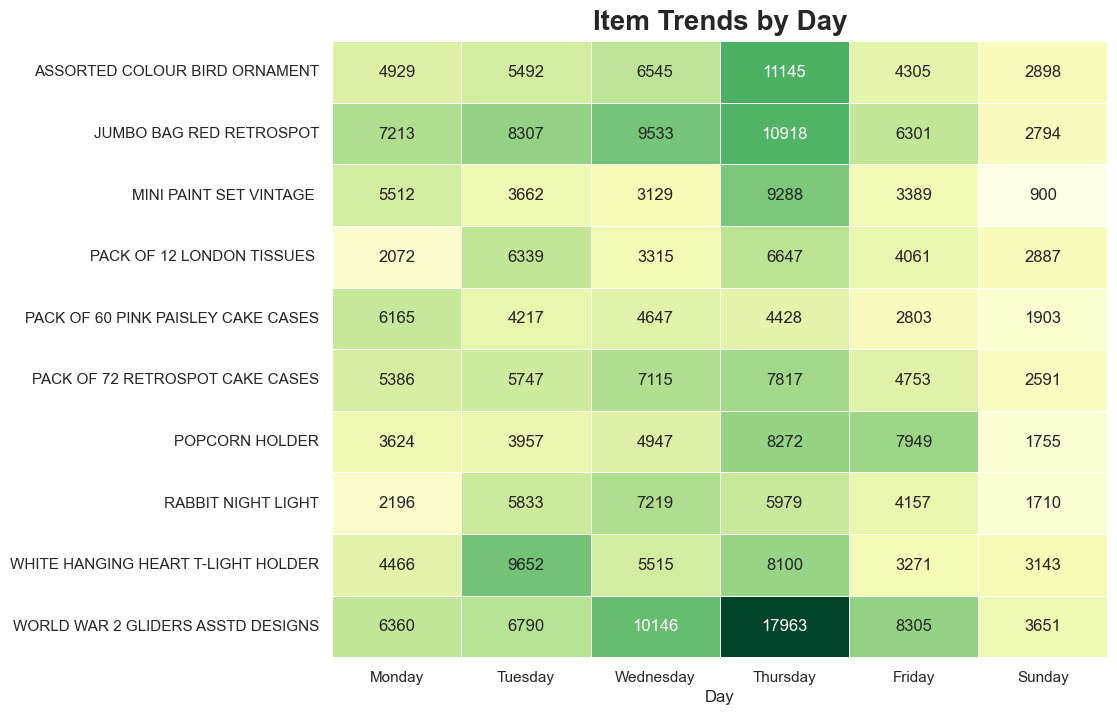

In [30]:
# find the most frequently sold products
top_10_products = ecommerce.groupby('Description', as_index=False)\
    .agg({'Quantity': 'sum'}).sort_values('Quantity', ascending=False).head(10)
top_10_products = ecommerce[ecommerce['Description'].isin(top_10_products['Description'])]\

# Group by month and product identifier, and calculate the sum of items sold
item_trends_crosstab = pd.crosstab(top_10_products['Description'], top_10_products['DayOfWeek'], values=top_10_products['Quantity'], aggfunc='sum')
item_trends_crosstab.fillna(0, inplace=True)

# change columns to day names and month names
item_trends_crosstab.columns = item_trends_crosstab.columns.map(lambda x: calendar.day_name[x])

# plot the heatmap
fig = plt.figure(figsize=(10, 8))

sns.heatmap(item_trends_crosstab, cmap='YlGn', annot=True, fmt='g', linewidths=0.5, cbar=False)

plt.title('Item Trends by Day', fontsize=20, fontweight='bold', y=1.005)

plt.xlabel('Day')
plt.ylabel('')

plt.yticks(rotation=0)

plt.show()

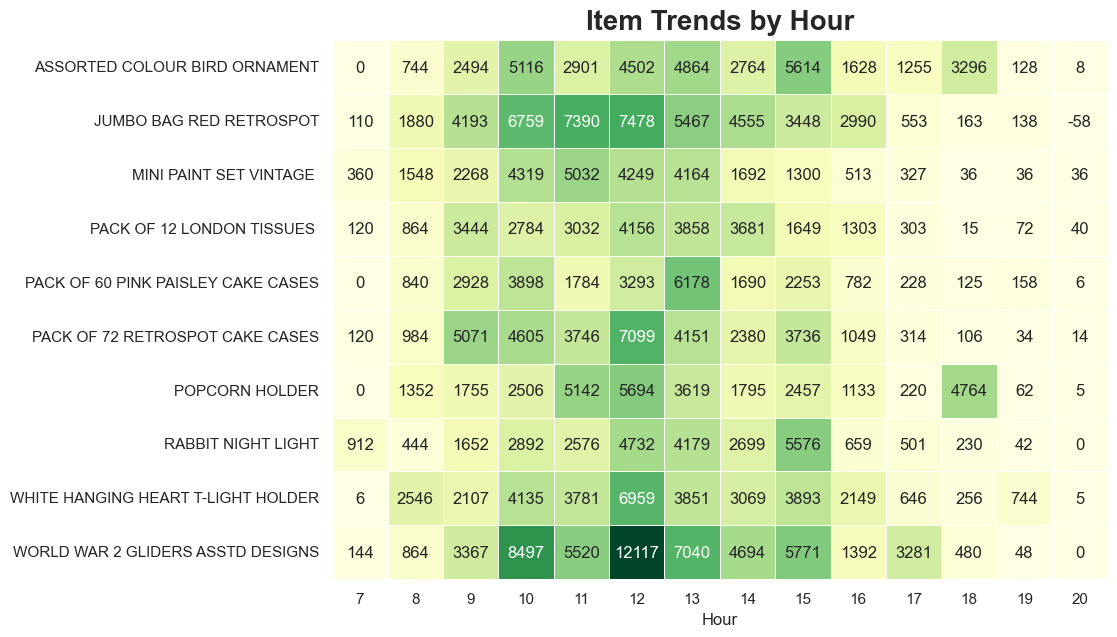

In [31]:
# find the most frequently sold products
top_10_products = ecommerce.groupby('Description', as_index=False)\
    .agg({'Quantity': 'sum'}).sort_values('Quantity', ascending=False).head(10)
top_10_products = ecommerce[ecommerce['Description'].isin(top_10_products['Description'])]\

# Group by month and product identifier, and calculate the sum of items sold
item_trends_crosstab = pd.crosstab(top_10_products['Description'], top_10_products['Hour'], values=top_10_products['Quantity'], aggfunc='sum')
item_trends_crosstab.fillna(0, inplace=True)

# plot the heatmap
fig = plt.figure(figsize=(10, 7))

sns.heatmap(item_trends_crosstab, cmap='YlGn', annot=True, fmt='g', linewidths=0.5, cbar=False)

plt.title('Item Trends by Hour', fontsize=20, fontweight='bold', y=1.005)

plt.xlabel('Hour')
plt.ylabel('')

plt.yticks(rotation=0)

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bb509a20-140b-428c-93de-45b1c98eb27e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>